# In this notebook
I show how I go through images to confirm that the masks look good.

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt

import torch
from torchvision import transforms

In [ ]:
# Confirm that you can correctly look at an image with a mask
mask_path = '/scratch/zach/masks/'
img_path = '/scratch/zach/solar-pv/'
files = os.listdir(mask_path)
img = Image.open(mask_path+files[0])
base_img = Image.open(img_path+files[0])
plt.figure(figsize=(10,10))
plt.imshow(base_img)
plt.imshow(img, alpha=0.5)
plt.show()

In [3]:
# Create the transform needed 
trans = transforms.ToTensor()

In [9]:
# This function creates a generator that will generate a new masked
# example each time it is called.

def get_masked_example():
	for fn in files:
		# Get the 
		img = Image.open(mask_path+fn)
		if trans(img).sum().item() > 0:
			base_img = Image.open(img_path+fn)
			yield img, base_img

ex_iter = get_masked_example()

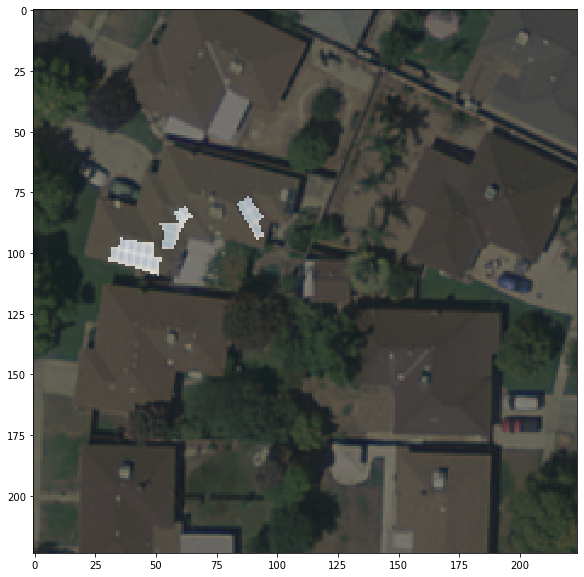

In [36]:
# Using the generator, you can run this cell multiple times to 
# look at examples
img, base = next(ex_iter)

plt.figure(figsize=(10,10))
plt.imshow(base)
plt.imshow(img, alpha=0.5)
plt.show()

In [43]:
# This piece of code was used to generate tensor versions of all of the images
# and save the results in a directory so that the model could very quickly
# just load the tensor of the mask, directly.
target_dir = '/scratch/zach/mask_tensors/'
count = 0
for fn in files:
	try:
		img = Image.open(mask_path+fn)
		if trans(img).sum().item() > 0:
			# Save the object as a tensor
			name = fn.split(".")[0]
			trs = trans(img)
			trs[trs > 0] = 1
			torch.save(trs, target_dir+name+'.pt')
		else:
			os.remove(mask_path+fn)
	except FileNotFoundError:
		count += 1
print(f"{count} files not found")

2 files not found


In [3]:
# In the solar data, I found that there were some images with 4 channels,
# so I use this code and the cell below to look through those images
# and convert them to RGB
mask_path = '/scratch/zach/masks/'
img_path = '/scratch/zach/solar-pv/'
files = os.listdir(img_path)

imgs_with_more_bands = []
for fn in files:
	img = Image.open(img_path+fn)
	if len(img.getbands()) > 3:
		imgs_with_more_bands.append(fn)

In [20]:
# Convert and save over the image with the RGB version.
for fn in imgs_with_more_bands:
	img = Image.open(img_path+fn)
	new_img = img.convert('RGB')
	new_img.save(img_path+fn)